In [13]:
import pandas as pd
data = pd.read_csv('../data/tfidf_data_model_annotations_liwc_h.csv')
data.head(1)
X = data.drop(columns='model_unanimous', axis=1)
y = data['model_unanimous']

# Scaling

In [14]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(X)

array([[-1.        ,  0.        ,  0.        , ...,  0.        ,
         1.83940397, 12.5       ],
       [-0.99984223,  0.        ,  0.        , ...,  0.96486486,
         0.26269316,  0.        ],
       [-0.99968447,  0.        ,  0.        , ...,  0.79459459,
        -0.10816777,  0.        ],
       ...,
       [ 0.99968447,  0.        ,  0.        , ...,  0.        ,
        -0.07119205,  0.        ],
       [ 0.99984223,  0.        ,  0.        , ...,  0.        ,
         0.11479029,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  1.68918919,
         0.45971302,  0.        ]])

# Clustering kmeans

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto", init='k-means++')
predictions = kmeans.fit_predict(X)



In [16]:
X['predicted_clusters'] = predictions
X['model_unanimous'] = data['model_unanimous']

cluster_label_distribution = X.groupby('predicted_clusters')['model_unanimous'].value_counts().unstack(fill_value=0)

print(cluster_label_distribution)


model_unanimous       PO   PP    UN
predicted_clusters                 
0                   2480  301  1444
1                   2214  295  1722
2                   2297  338  1587


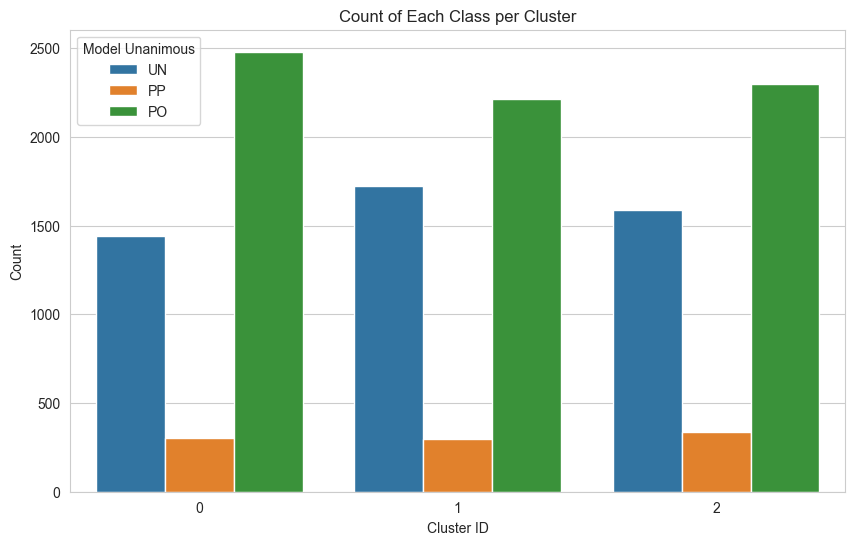

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='predicted_clusters', hue='model_unanimous', data=X)
plt.title('Count of Each Class per Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.legend(title='Model Unanimous')
plt.show()


# Spectral Clustering

In [18]:
X = data.drop(columns='model_unanimous', axis=1)
y = data['model_unanimous']
from sklearn.cluster import SpectralClustering
kmeans = SpectralClustering(n_clusters=3, random_state=0, affinity='nearest_neighbors')
predictions = kmeans.fit_predict(X)



In [19]:
X['predicted_clusters'] = predictions
X['model_unanimous'] = data['model_unanimous']

cluster_label_distribution = X.groupby('predicted_clusters')['model_unanimous'].value_counts().unstack(fill_value=0)

print(cluster_label_distribution)


model_unanimous       PO   PP    UN
predicted_clusters                 
0                   1832  258  1389
1                   2027  293  1370
2                   3132  383  1994


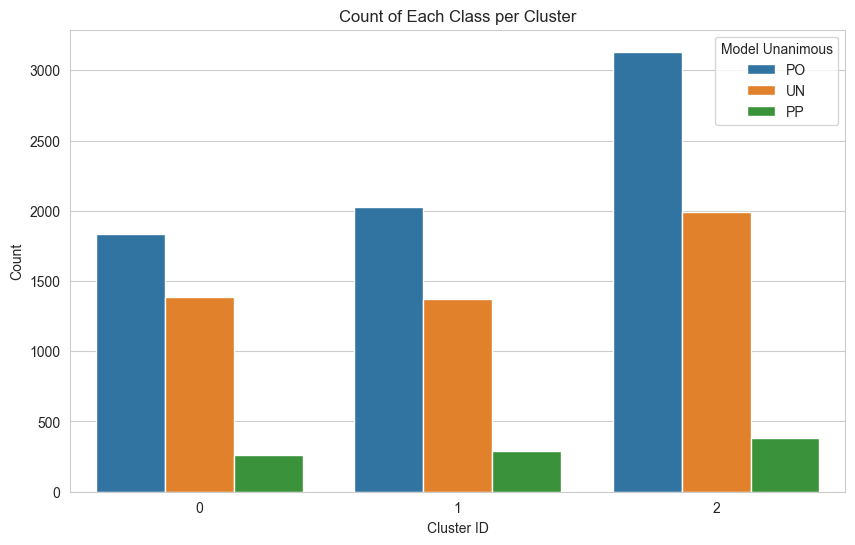

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='predicted_clusters', hue='model_unanimous', data=X)
plt.title('Count of Each Class per Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.legend(title='Model Unanimous')
plt.show()


# Kmeans clustering tf_idf

In [21]:
data = pd.read_csv('../data/tfidf_only.csv')
data.head(1)
X = data.drop(columns='model_unanimous', axis=1)
y = data['model_unanimous']

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto", init='k-means++')
predictions = kmeans.fit_predict(X)



In [23]:
X['predicted_clusters'] = predictions
X['model_unanimous'] = data['model_unanimous']

cluster_label_distribution = X.groupby('predicted_clusters')['model_unanimous'].value_counts().unstack(fill_value=0)

print(cluster_label_distribution)


model_unanimous       PO   PP    UN
predicted_clusters                 
0                   2483  301  1442
1                   2214  296  1727
2                   2294  337  1584


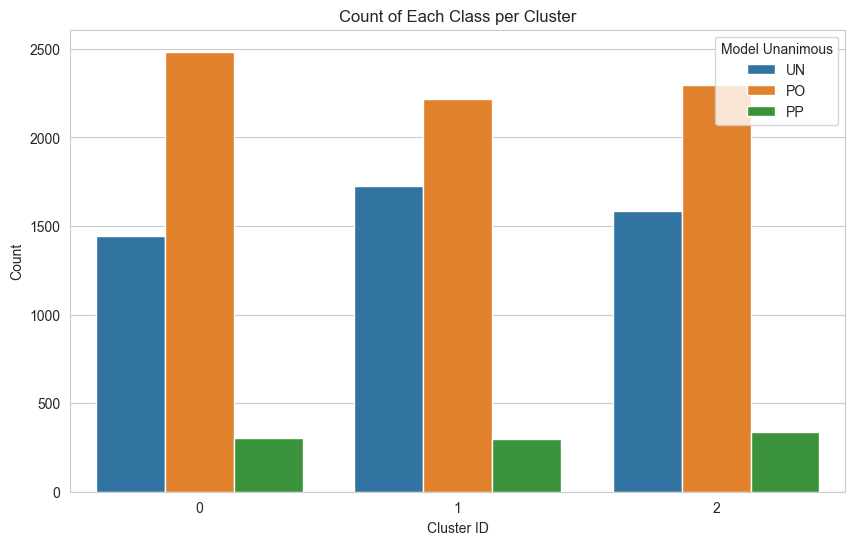

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='predicted_clusters', hue='model_unanimous', data=X)
plt.title('Count of Each Class per Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.legend(title='Model Unanimous')
plt.show()


# Kmeans clustering original data

In [56]:
data = pd.read_excel('../data/model_annotations_liwc_h.xlsx')
data.head(1)
X = data.drop(columns=['model_unanimous', 'text', 'proc_text'], axis=1)
y = data['model_unanimous']

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

pca.fit_transform(X)   

array([[ 48.65780561,   7.02780766, -21.47732201,  29.14082464],
       [ -9.68102207, -51.81316163,  -7.62728567, -15.92027095],
       [ 17.87243987, -13.21590082,  -7.76650687, -12.0684269 ],
       ...,
       [ -3.92440199, -18.13983073,  11.2720782 , -43.61531836],
       [-25.7193251 , -30.30143411,  21.05335662, -46.50590618],
       [ -2.20381538, -33.52570249, -23.06656067,  23.06415495]])

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto", init='k-means++')
predictions = kmeans.fit_predict(X)



In [59]:
X['predicted_clusters'] = predictions
X['model_unanimous'] = data['model_unanimous']

cluster_label_distribution = X.groupby('predicted_clusters')['model_unanimous'].value_counts().unstack(fill_value=0)

print(cluster_label_distribution)


model_unanimous       PO   PP    UN
predicted_clusters                 
0                   2809   43  1408
1                   2405   27  1803
2                   1777  864  1542


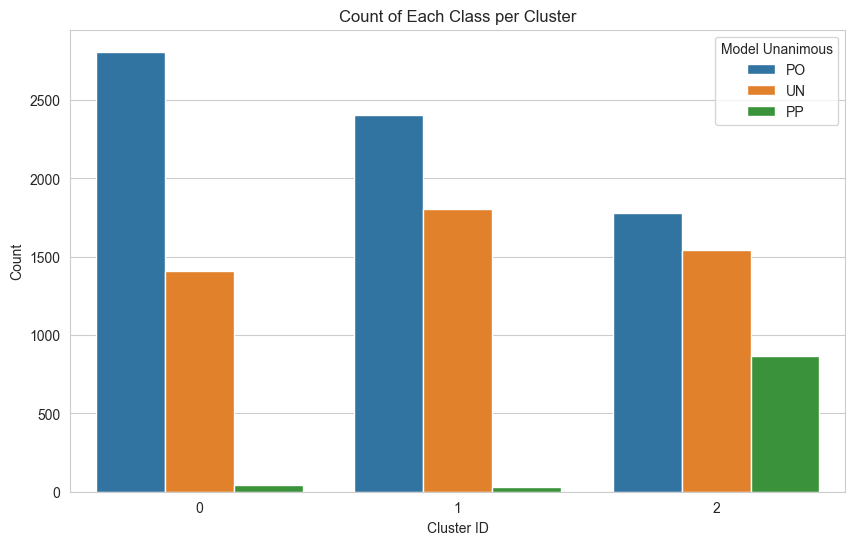

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='predicted_clusters', hue='model_unanimous', data=X)
plt.title('Count of Each Class per Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.legend(title='Model Unanimous')
plt.show()
